In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn import preprocessing,model_selection
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier,LogisticRegression,


In [2]:
%matplotlib inline

In [95]:
def check_score(clf,X_train,y_train,X_valid,y_valid):
    cv_score=-model_selection.cross_val_score(clf,X_train,y_train,cv=3,scoring='neg_log_loss').mean()
    clf.fit(X_train,y_train)
    y_pred=clf.predict_proba(X_valid)
    holdout_score=log_loss(y_valid, y_pred)
    return cv_score,holdout_score

In [99]:
all_train=pd.read_csv('pre_train.csv',sep=';',index_col=0)
all_test=pd.read_csv('pre_test.csv',sep=';',index_col=0)
X=all_train[all_train.columns[:-1]]
y=all_train[all_train.columns[-1]]
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
all_test.dtypes

age            float64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
BMI            float64
dtype: object

RandomForestClassifier

In [101]:
rf=RandomForestClassifier(random_state=0)
check_score(rf,X_train,y_train,X_valid,y_valid)

ValueError: Unknown label type: 'continuous'

LogisticRegression

In [91]:
y_train.values

array([ 24.65483235,  23.7332384 ,  31.14186851, ...,  25.90945695,
        25.0995016 ,  20.42835711])

In [90]:
lr=LogisticRegression()
check_score(lr,X_train,y_train.values,X_valid,y_valid.values)

ValueError: Unknown label type: 'continuous'

In [68]:
sgd = SGDClassifier(loss='log',random_state=42)
check_score(sgd,X_train,y_train,X_valid,y_valid)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


(12.689599083846351, 12.991273662703854)

In [18]:
def write_answer(clf,test_data):
    y_pred=clf.predict_proba(test_data)
    np.savetxt('result.csv',y_pred[:,1],fmt='%f')

In [164]:
write_answer(rf,all_test)

In [19]:
write_answer(lr,all_test)

In [20]:
lr.summary()

AttributeError: 'LogisticRegression' object has no attribute 'summary'

# Анализ

In [54]:
all_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [62]:
sns.pairplot(all_train[all_train.columns[1:]])
plt.show()

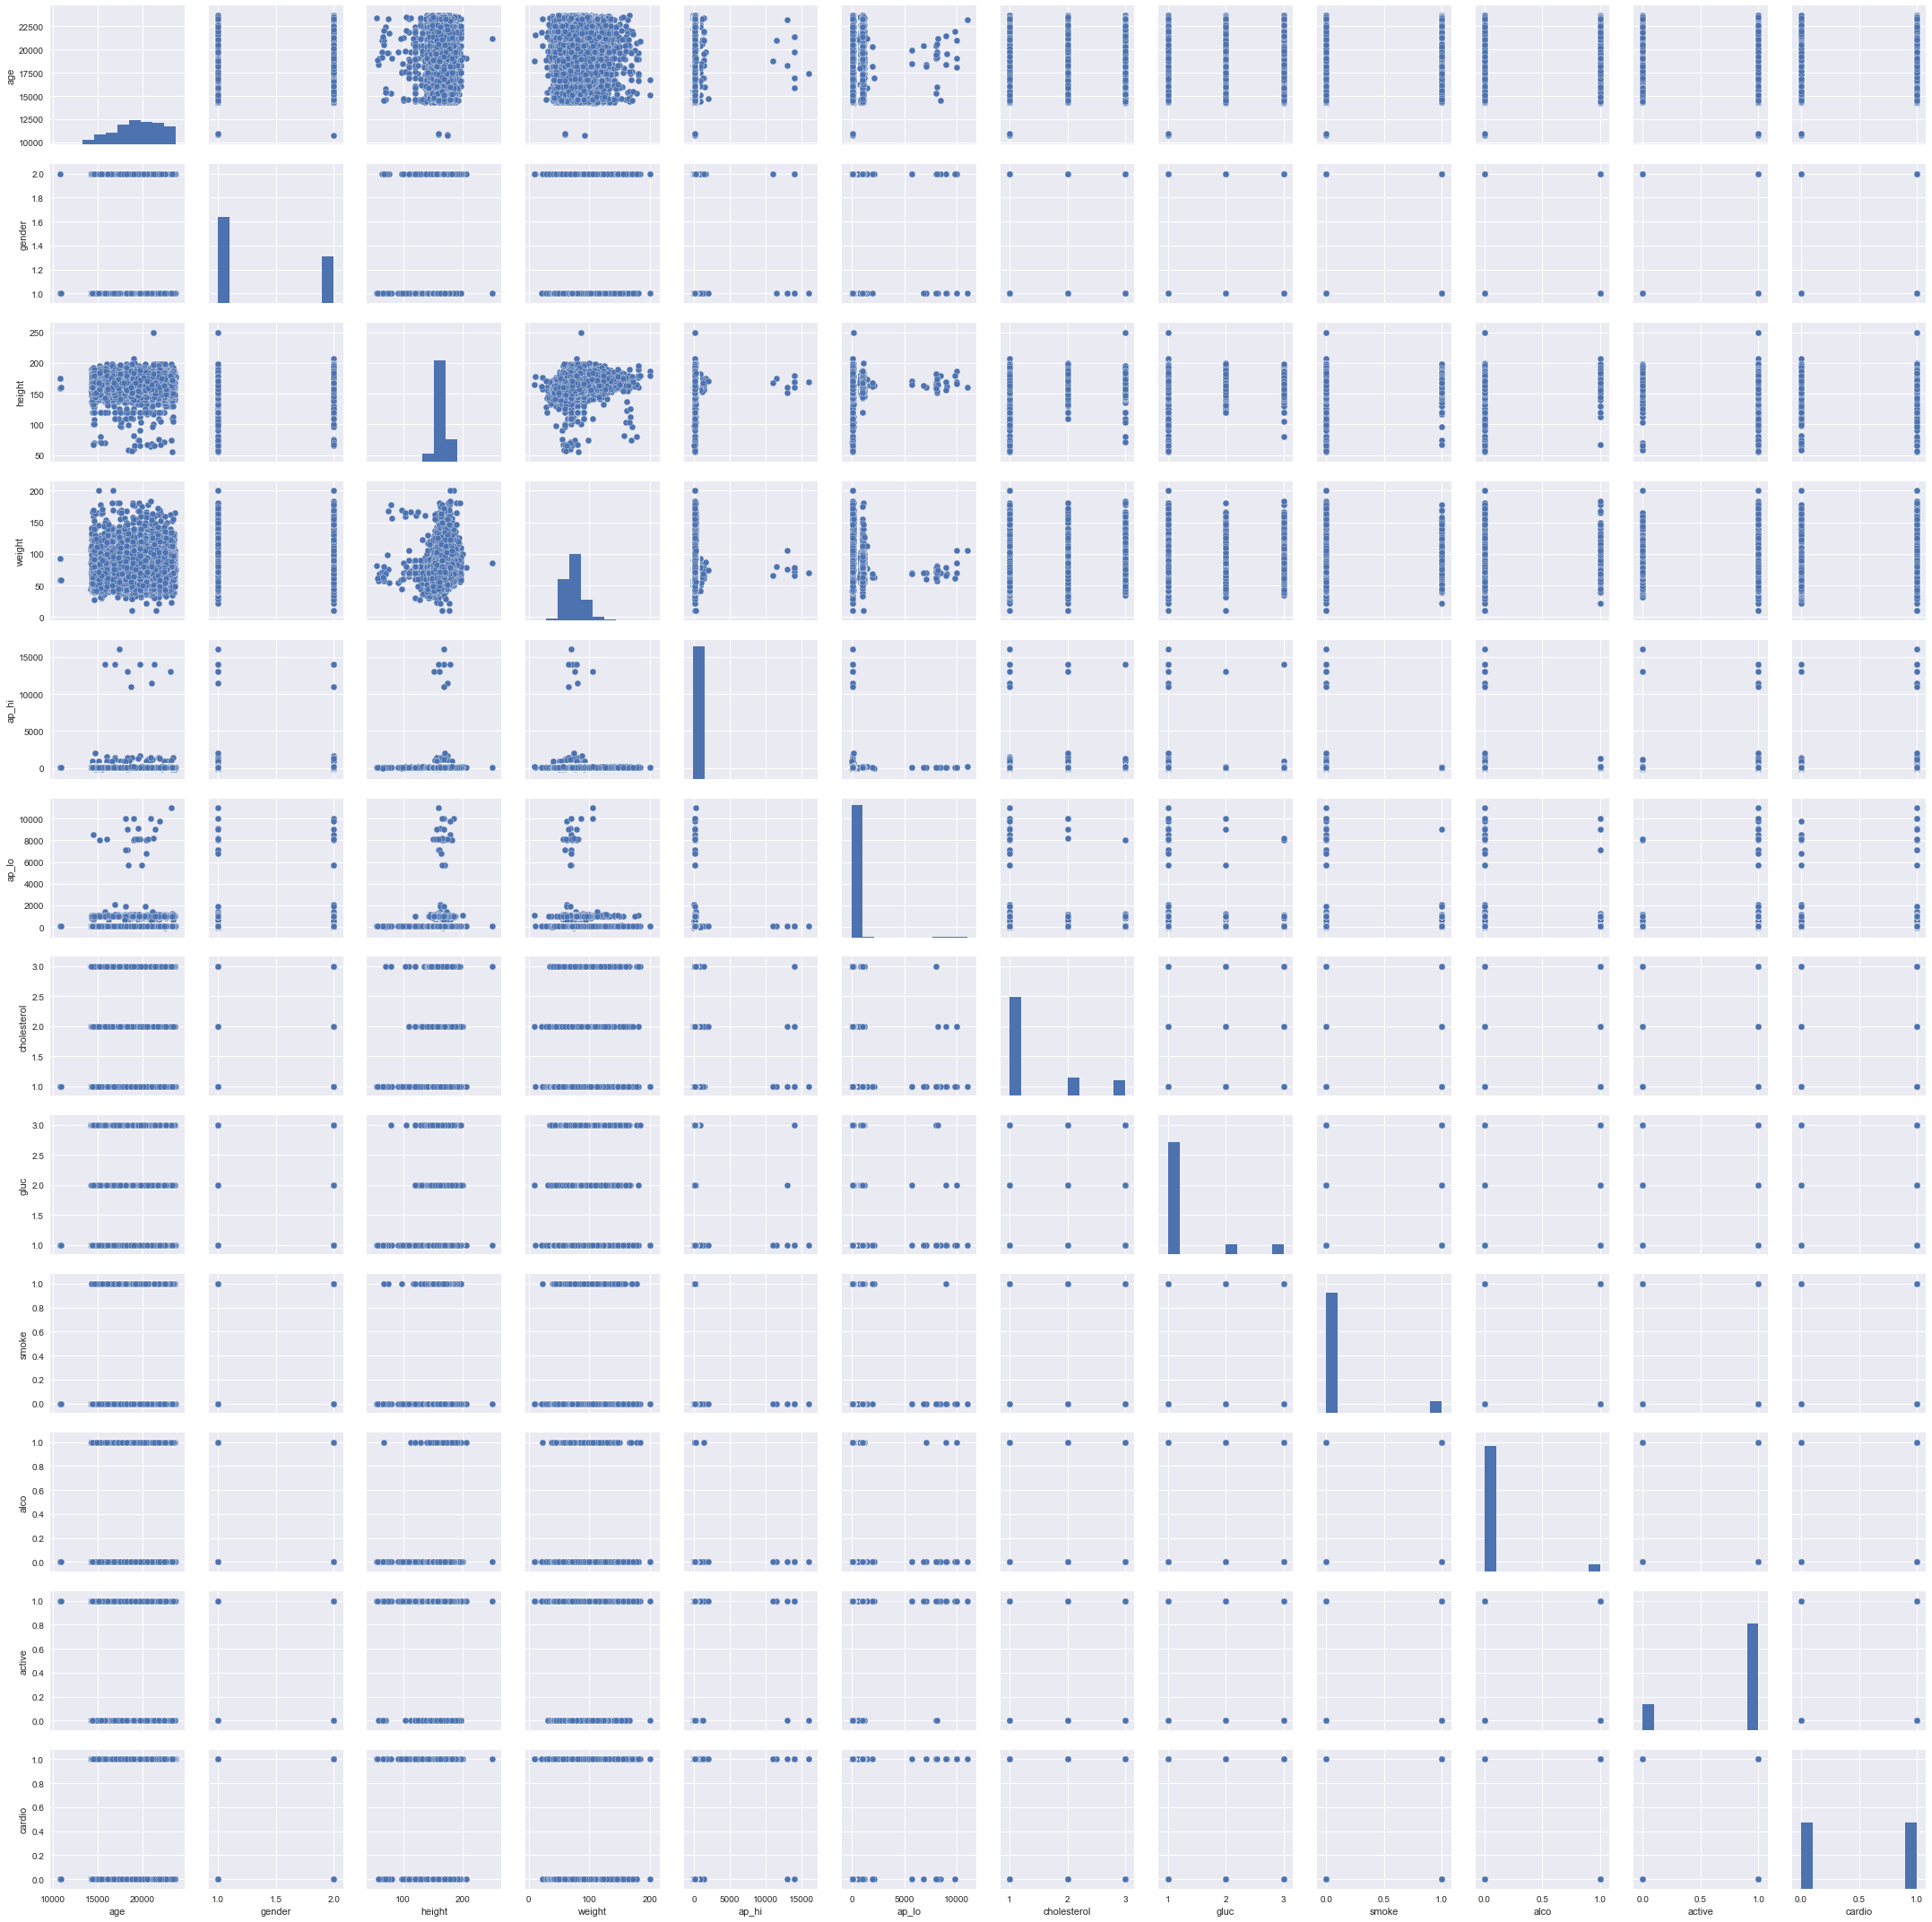

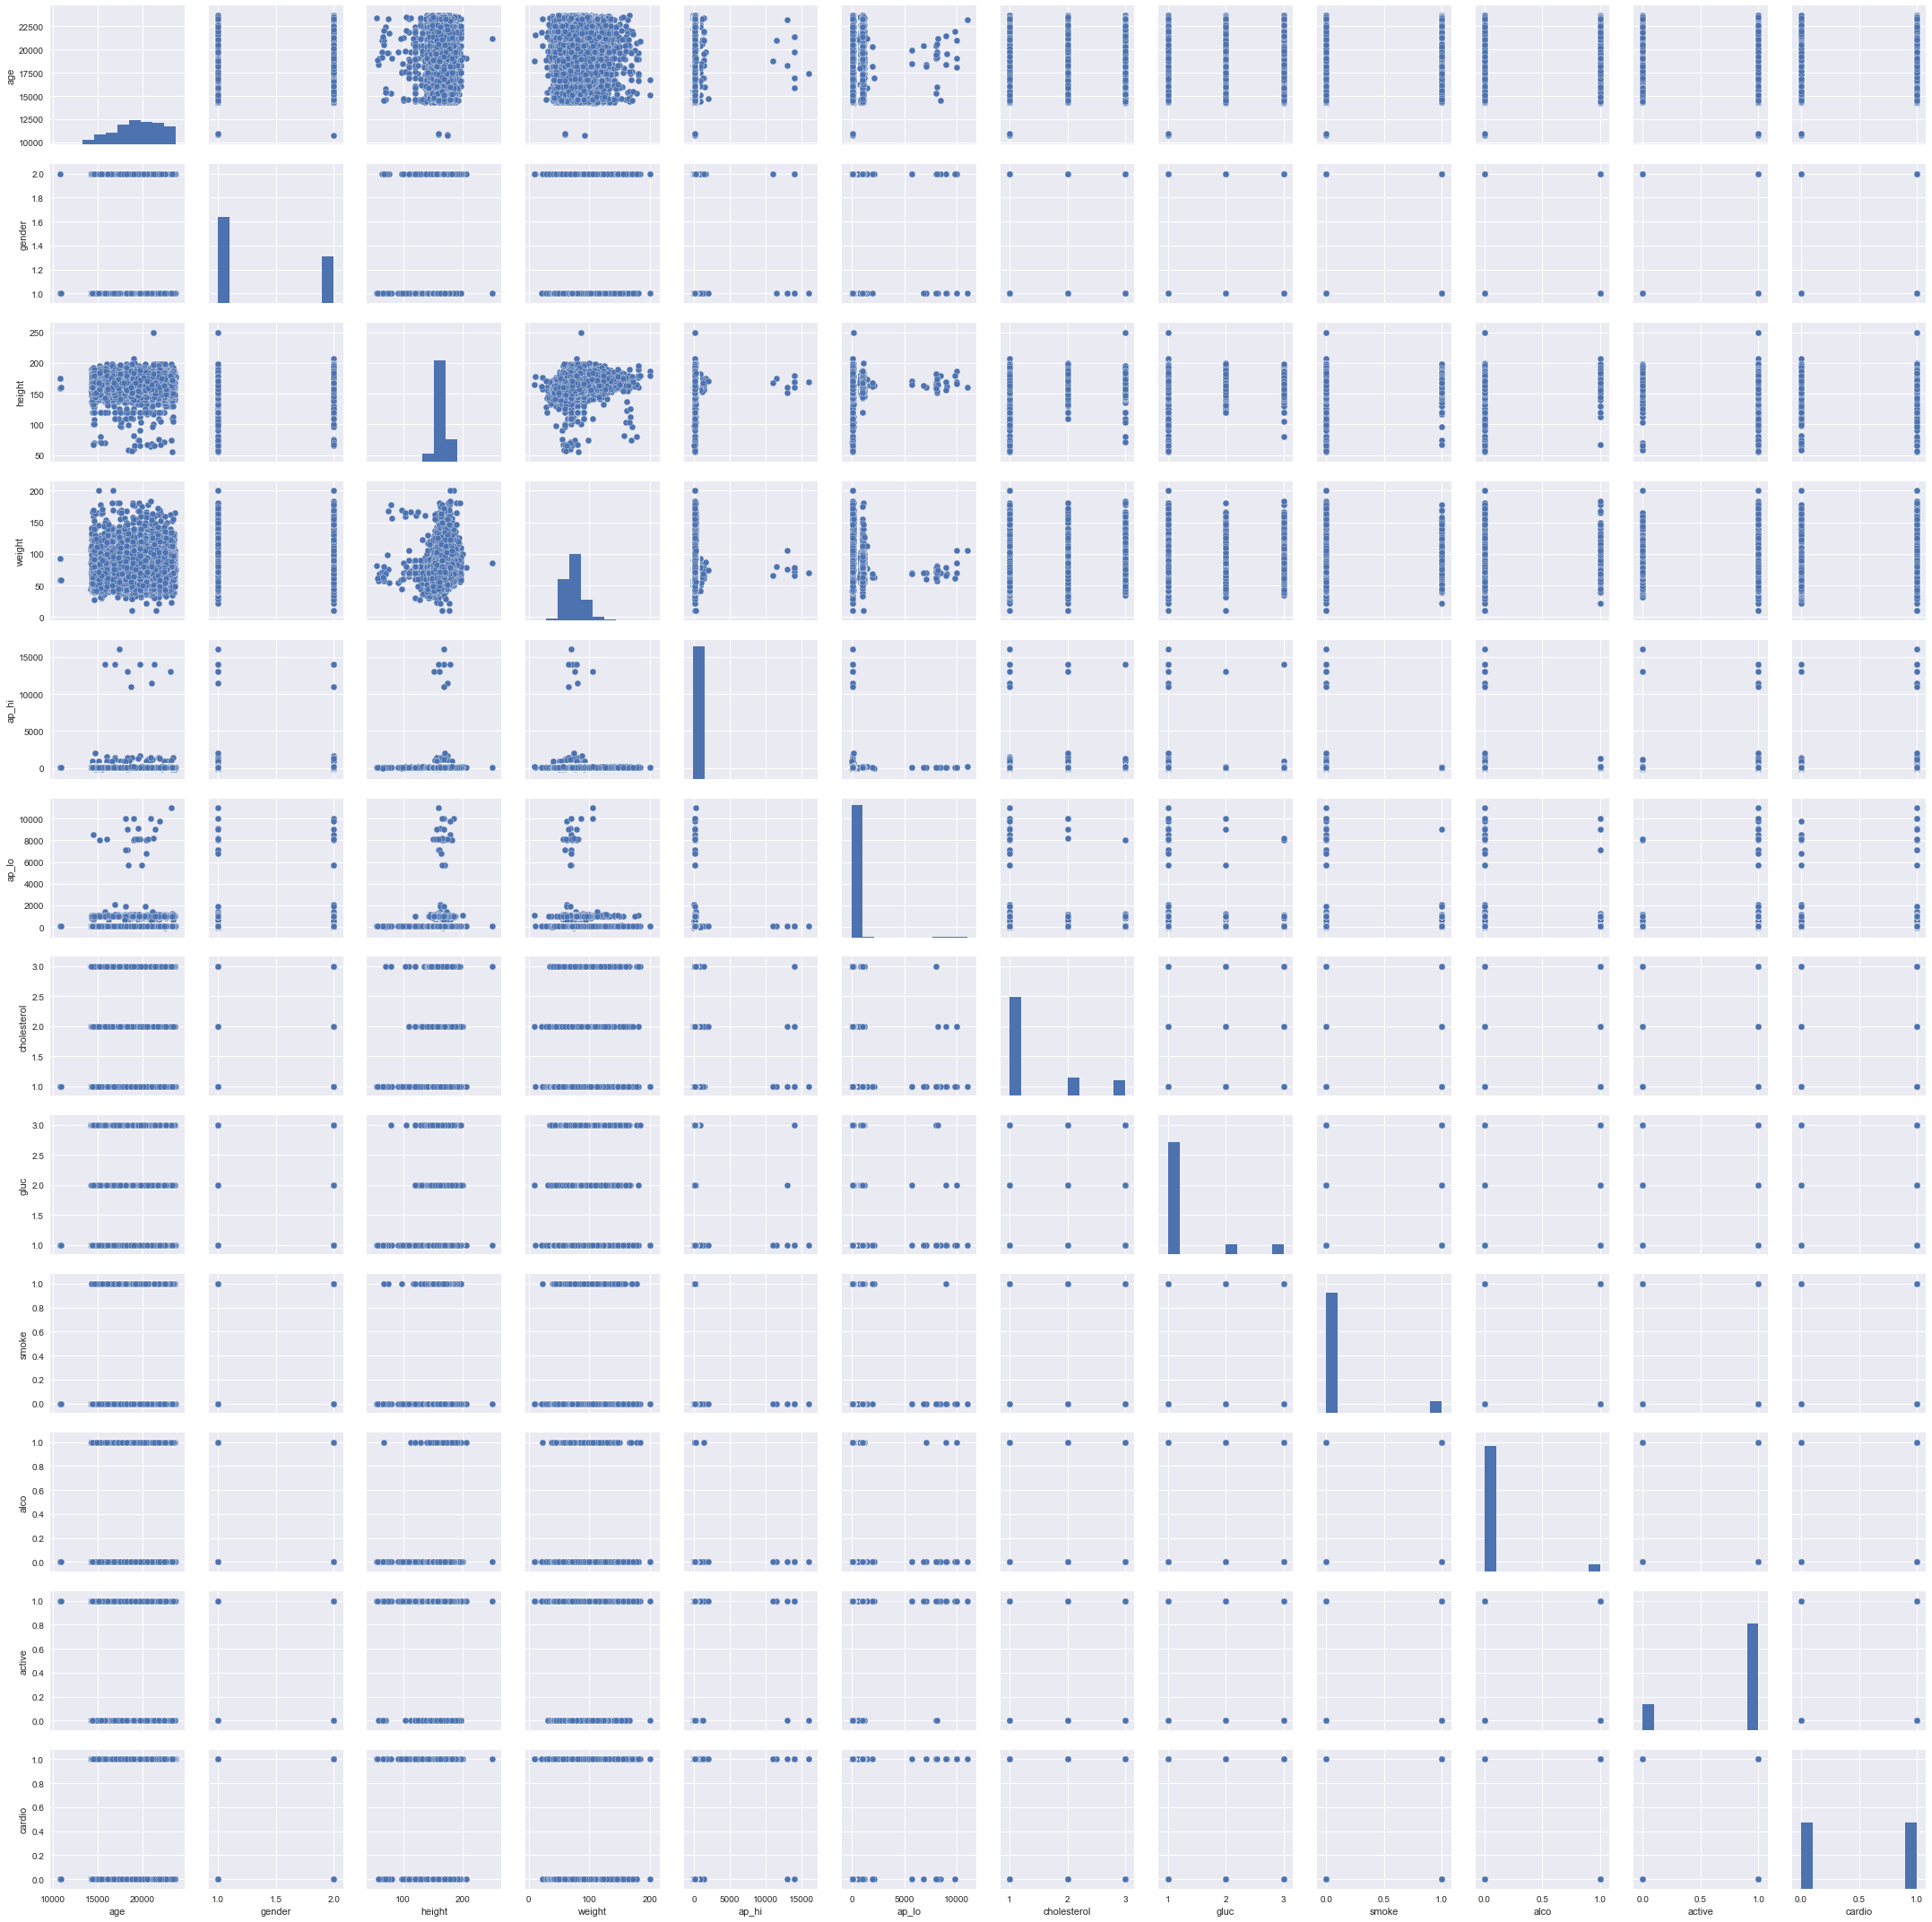

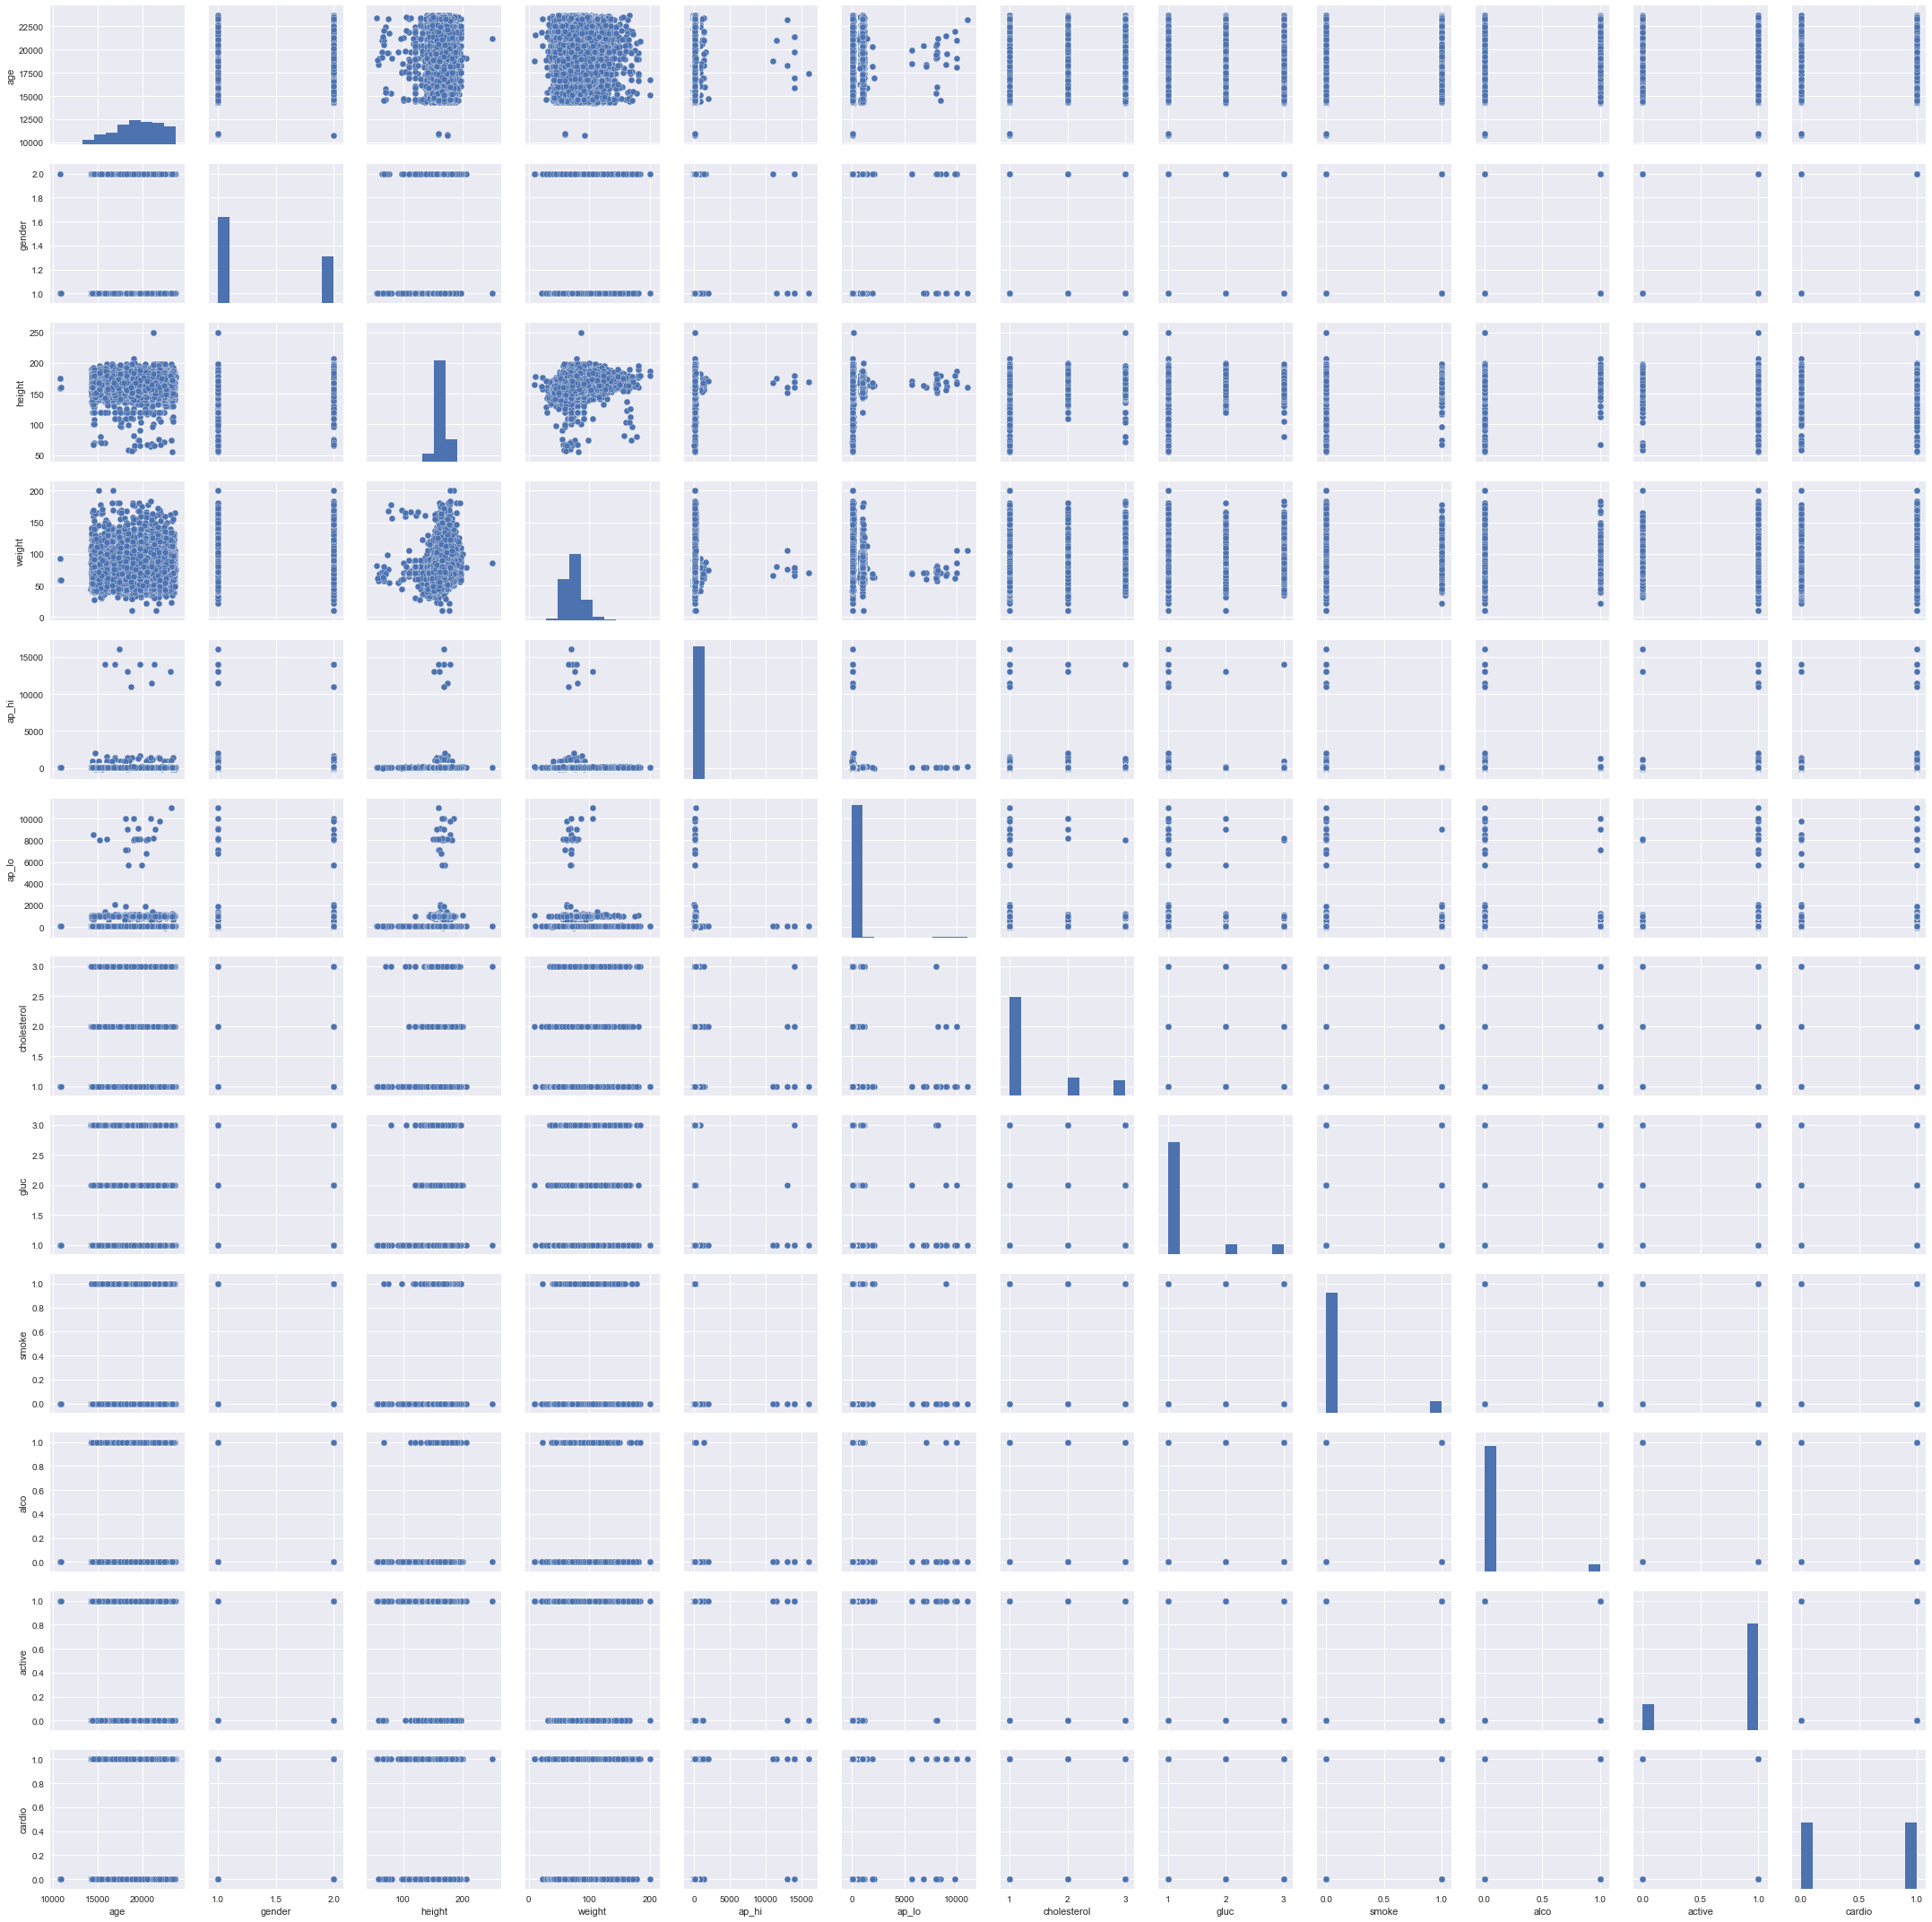